In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
from IRLS import IRLS

In [3]:
def gen_scheme_1(a):
    n = 1000
    p = 2
    
    y = np.random.randint(2, size=n)
    X = np.zeros((n,p))
    
    for i, yi in enumerate(y):
        if yi == 0:
            X[i, :] = np.random.normal(0, 1,size=(p))
        else:
            X[i, :] = np.random.normal(a, 1,size=(p))

    return X, y

X, y = gen_scheme_1(3)
X = StandardScaler().fit_transform(X)

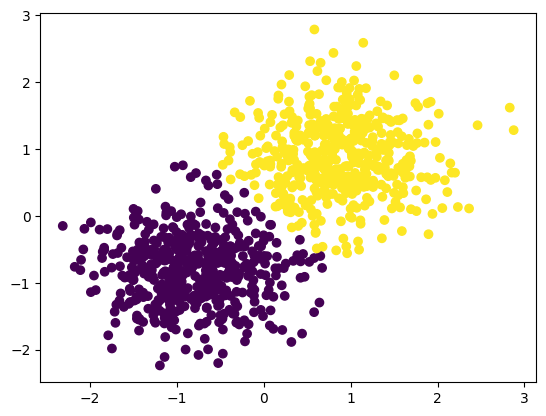

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=IRLS().fit_predict(X, y))

In [5]:
from sklearn.linear_model import LogisticRegression
LogisticRegression(fit_intercept=True, penalty=None).fit(X, y).intercept_

array([-0.59656074])

In [6]:
LogisticRegression(fit_intercept=True, penalty=None).fit(X, y).coef_

array([[4.86495097, 4.70598627]])

In [7]:
IRLS(fit_intercept="column").fit(X, y).params()["beta"]

array([-0.59656221,  4.864951  ,  4.7059861 ])

In [8]:
IRLS(fit_intercept="column", interactions=[[0, 1]]).fit(X, y).params()

{'beta': array([-0.88696159,  5.2761569 ,  5.06732087, -1.96772394]),
 'intercept': -0.8869615861346002,
 'beta_features': array([5.2761569 , 5.06732087]),
 'beta_interactions': array([-1.96772394]),
 'fitted_log_likelihood': -56.74436074106985,
 'fitted_iterations': 12}

In [9]:
X_noscale, y_noscale = gen_scheme_1(3)
IRLS(fit_intercept="column").fit(X_noscale, y_noscale).params()

{'beta': array([-8.73219062,  2.86938854,  3.01157195]),
 'intercept': -8.732190621210222,
 'beta_features': array([2.86938854, 3.01157195]),
 'beta_interactions': array([], dtype=float64),
 'fitted_log_likelihood': -48.30774602343798,
 'fitted_iterations': 11}

In [10]:
def generate_data_polynomial(n = 100):   
    # N(0, 1) distribution
    X = np.random.normal(size=(n,2))
    
    # generate 1 class near 0
    y = (np.random.uniform(size=(n)) > X[:, 0]**2) + 0
    
    return X, y

In [11]:
X_poly, y_poly = generate_data_polynomial(200)

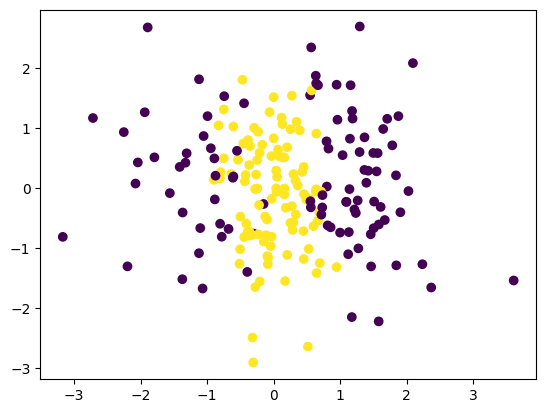

In [12]:
plt.scatter(X_poly[:,0], X_poly[:,1], c=y_poly)

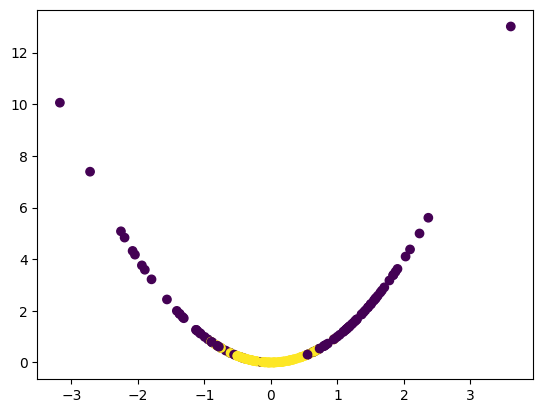

In [13]:
plt.scatter(X_poly[:,0], X_poly[:,0]*X_poly[:,0], c=y_poly)

In [14]:
np.mean(
    IRLS(fit_intercept="column").fit(X_poly, y_poly).predict(X_poly) == y_poly
)

0.65

In [15]:
np.mean(
    IRLS(fit_intercept="column", interactions=[[0, 0]]).fit(X_poly, y_poly).predict(X_poly) == y_poly
)

0.895

In [16]:
def generate_data_xor(n = 100):   
    # N(0, 1) distribution
    X = np.random.normal(size=(n,2))
    
    # generate 1 class near 0
    y = (np.random.normal(0, 0.5, size=n) > X[:, 0] * X[:, 1]) + 0
    
    return X, y

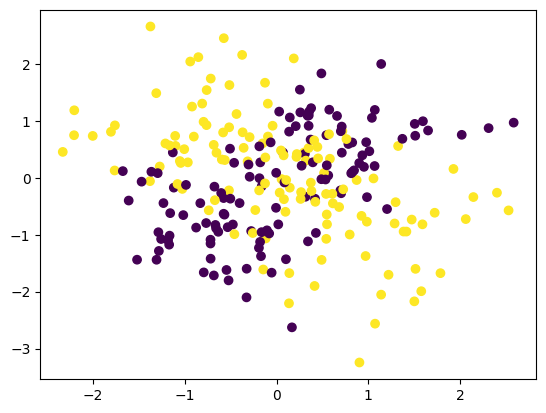

In [17]:
X_xor, y_xor = generate_data_xor(250)
plt.scatter(X_xor[:,0], X_xor[:,1], c=y_xor)

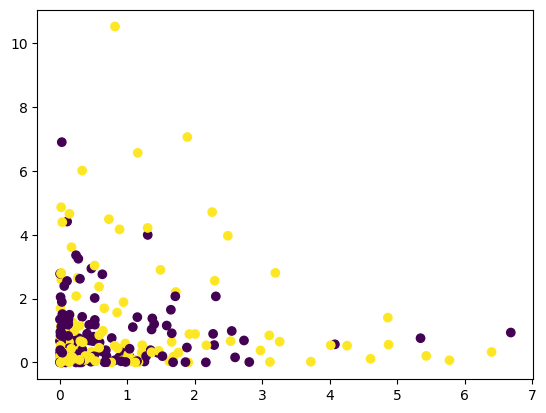

In [18]:
plt.scatter(X_xor[:,0]*X_xor[:,0], X_xor[:,1]*X_xor[:,1], c=y_xor)
# no decider on self-interaction (square)

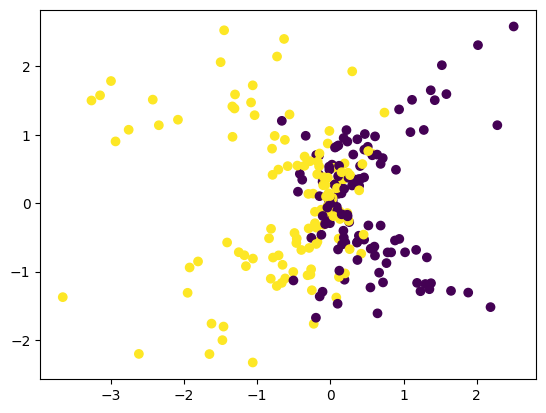

In [19]:
plt.scatter(X_xor[:,0]*X_xor[:,1], X_xor[:,0], c=y_xor)
# linear decision boundary visible when considering interactions

In [20]:
np.mean(
    IRLS().fit(X_xor, y_xor).predict(X_xor) == y_xor
)

0.544

In [21]:
np.mean(
    IRLS(interactions=[[0, 0],[1, 1]]).fit(X_xor, y_xor).predict(X_xor) == y_xor
)

0.564

In [22]:
np.mean(
    IRLS(interactions=[[0, 1]]).fit(X_xor, y_xor).predict(X_xor) == y_xor
)

0.76

In [23]:
def generate_data(n = 50, beta = [1, .5, .5]):
    X = np.random.normal(0, 1, size=(n, len(beta)-1))
    b0 = beta[0]
    b = beta[1:]
    exp_part = - (b0 + np.sum(X * b, axis=1))
    p = 1 / (1 + np.exp(exp_part))
    y = np.random.binomial(1, p, n)
    
    return X, y

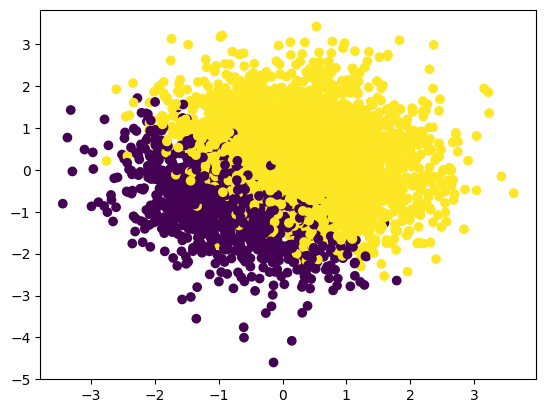

In [24]:
X, y = generate_data(5000, beta = [3, 3, 3])
plt.scatter(X[:, 0], X[:, 1], c=y)

In [25]:
np.mean(
    IRLS(fit_intercept="column").fit(X, y).predict(X) == y
)

0.8928

In [26]:
IRLS(fit_intercept="column").fit(X, y).params()

{'beta': array([3.02121539, 2.99197645, 2.91221379]),
 'intercept': 3.0212153903212444,
 'beta_features': array([2.99197645, 2.91221379]),
 'beta_interactions': array([], dtype=float64),
 'fitted_log_likelihood': -1174.3285273397214,
 'fitted_iterations': 10}